<a href="https://colab.research.google.com/github/mehrshad-sdtn/DeepLearning/blob/master/DL-PyTorch/2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from PIL import Image, ImageFile
from torchvision import transforms

In [50]:
workdir = '/content/drive/MyDrive/Pytorch-Deep-Learning'
os.chdir(workdir)
os.getcwd()

'/content/drive/MyDrive/Pytorch-Deep-Learning'

In [51]:
data_path = workdir + '/Datasets/CatFish'

In [52]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

Loading the data and creating the datasets

In [53]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [54]:
train_data_path = data_path + '/train/'
val_data_path = data_path + '/val/'
test_data_path = data_path + '/test/'

img_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225] )
    ])

train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=img_transforms, is_valid_file=check_image)
val_data = torchvision.datasets.ImageFolder(root=val_data_path, transform=img_transforms, is_valid_file=check_image)
test_data = torchvision.datasets.ImageFolder(root=test_data_path, transform=img_transforms, is_valid_file=check_image)

In [55]:
batch_size = 64
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

Building the Neural Network

In [56]:
class SimpleNet(nn.Module):

  def __init__(self):
    super(SimpleNet, self).__init__()
    self.fc1 = nn.Linear(64*64*3, 84)
    self.fc2 = nn.Linear(84, 50)
    self.fc3 = nn.Linear(50, 2)

  def forward(self, x):
    x = x.view(-1, 64*64*3)
    x = F.relu(self.fc1(x))
    x  = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


In [57]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            # 1) zero out gradients
            optimizer.zero_grad()

            # 2) seperate labels and inputs from batch and load to device
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)

            # 3) calculate outputs
            output = model(inputs)

            # 4) calcualte loss
            loss = loss_fn(output, targets)

            # 5) backprop
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)

        training_loss /= len(train_loader.dataset)

        model.eval()
        num_correct = 0
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets)
            valid_loss += loss.data.item() * inputs.size(0)
            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))


In [60]:
simplenet = SimpleNet()
simplenet.to(device)
simplenet = SimpleNet()
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [61]:
train(simplenet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader, epochs=20, device=device)

Epoch: 1, Training Loss: 1.94, Validation Loss: 8.80, accuracy = 0.26
Epoch: 2, Training Loss: 4.32, Validation Loss: 0.74, accuracy = 0.74
Epoch: 3, Training Loss: 0.58, Validation Loss: 1.48, accuracy = 0.38
Epoch: 4, Training Loss: 0.98, Validation Loss: 0.55, accuracy = 0.78
Epoch: 5, Training Loss: 0.35, Validation Loss: 0.76, accuracy = 0.68
Epoch: 6, Training Loss: 0.40, Validation Loss: 0.63, accuracy = 0.71
Epoch: 7, Training Loss: 0.28, Validation Loss: 0.67, accuracy = 0.69
Epoch: 8, Training Loss: 0.28, Validation Loss: 0.63, accuracy = 0.72
Epoch: 9, Training Loss: 0.23, Validation Loss: 0.65, accuracy = 0.71
Epoch: 10, Training Loss: 0.22, Validation Loss: 0.62, accuracy = 0.73
Epoch: 11, Training Loss: 0.18, Validation Loss: 0.67, accuracy = 0.72
Epoch: 12, Training Loss: 0.18, Validation Loss: 0.64, accuracy = 0.73
Epoch: 13, Training Loss: 0.15, Validation Loss: 0.67, accuracy = 0.72
Epoch: 14, Training Loss: 0.13, Validation Loss: 0.66, accuracy = 0.74
Epoch: 15, Trai

In [62]:
labels = ['cat','fish']

img = Image.open(data_path+"/val/fish/100_1422.JPG")
img = img_transforms(img).to(device)
img = torch.unsqueeze(img, 0)

simplenet.eval()
prediction = F.softmax(simplenet(img), dim=1)
prediction = prediction.argmax()
print(labels[prediction])

fish


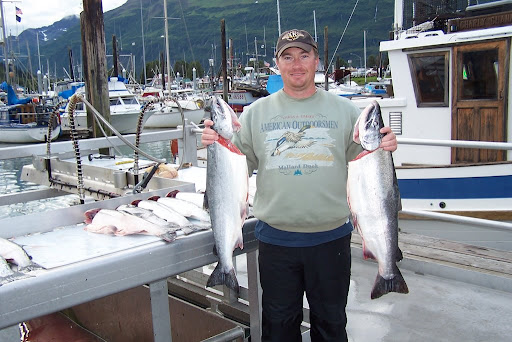

In [63]:
Image.open(data_path+"/val/fish/100_1422.JPG")